In [1]:
import scipy.io as sp
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
from numpy import loadtxt
from osgeo import gdal, gdalconst

In [23]:
asi = 'Input/Imagery/SingleDateImage_Amsterdam.tif'
ami = 'Input/Imagery/MedianImage_Amsterdam.tif'
msi = 'Input/Imagery/SingleDateImage_Milano.tif'
mmi = 'Input/Imagery/MedianImage_Milano.tif'
bsi = 'Input/Imagery/SingleDateImage_Budapest.tif'
bmi = 'Input/Imagery/MedianImage_Budapest.tif'

In [2]:
#read Matlab files and store
i_avg = sp.loadmat('i_avg.mat')
average = i_avg['I_avg']
average = np.ascontiguousarray(average)
#average1 = average[:,:,0]
#average2 = average[:,:,2]
#average = np.stack([average1, average2], axis=2)

i_ent = sp.loadmat('i_ent.mat')
entropy = i_ent['I_ent']
entropy = np.ascontiguousarray(entropy)
#entropy1 = entropy[:,:,0]
#entropy2 = entropy[:,:,2]
#entropy = np.stack([entropy1, entropy2], axis=2)

i_glcm_con = sp.loadmat('i_glcm_con.mat')
contrast = i_glcm_con['I_glcm_con']
contrast = np.ascontiguousarray(contrast)
#contrast1 = contrast[:,:,0]
#contrast2 = contrast[:,:,2]
#contrast = np.stack([contrast1, contrast2], axis=2)

i_glcm_cor = sp.loadmat('i_glcm_cor.mat')
correlation = i_glcm_cor['I_glcm_cor']
correlation = np.ascontiguousarray(correlation)
#correlation1 = correlation[:,:,0]
#correlation2 = correlation[:,:,2]
#correlation = np.stack([correlation1, correlation2], axis=2)

i_glcm_ene = sp.loadmat('i_glcm_ene.mat')
energy = i_glcm_ene['I_glcm_ene']
energy = np.ascontiguousarray(energy)
#energy1 = energy[:,:,0]
#energy2 = energy[:,:,2]
#energy = np.stack([energy1, energy2], axis=2)

i_glcm_hom = sp.loadmat('i_glcm_hom.mat')
homogeneity = i_glcm_hom['I_glcm_hom']
homogeneity = np.ascontiguousarray(homogeneity)
#homogeneity1 = homogeneity[:,:,0]
#homogeneity2 = homogeneity[:,:,2]
#homogeneity = np.stack([homogeneity1, homogeneity2], axis=2)

i_ran = sp.loadmat('i_ran.mat')
irange = i_ran['I_ran']
irange = np.ascontiguousarray(irange)
#irange1 = irange[:,:,0]
#irange2 = irange[:,:,2]
#irange = np.stack([irange1, irange2], axis=2)

i_std = sp.loadmat('i_std.mat')
std = i_std['I_std']
std = np.ascontiguousarray(std)
#std1 = std[:,:,0]
#std2 = std[:,:,2]
#std = np.stack([std1, std2], axis=2)

stack = np.concatenate((average, entropy, contrast, correlation, energy, homogeneity, irange, std), axis=2)
stack = stack.flatten()
GLCM_ASI = np.savetxt('GLCM_BMI.csv', stack, delimiter=',')

In [25]:
def read_data_EMP(inras):
    # Read data
    img = gdal.Open(inras, gdal.GA_ReadOnly) 
    bands = [img.GetRasterBand(i).ReadAsArray() for i in range(1, img.RasterCount + 1)]
    img = np.array(bands)
    img = img[0:12,:,:]
    img = np.transpose(img, [1, 2, 0])
    img_rgbnir = img[:,:,[3,2,1,7]]
    return img_rgbnir

In [33]:
GLCM_ASI_load = loadtxt('Output/Full/GLCM/ASI/GLCM_ASI.csv', delimiter=',')
img = read_data_EMP(asi)
nr, nc, nb = img.shape
nf = 16
GLCMas = GLCM_ASI_load.reshape(nr,nc,nf)

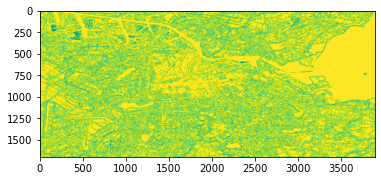

In [38]:
plt.imshow(GLCMas[:,:,16])

In [39]:
print(GLCMas.shape)

(1699, 3893, 24)


In [45]:
i_avg = sp.loadmat('Output/Full/GLCM/ASI/i_avg.mat')
average = i_avg['I_avg']
average = np.ascontiguousarray(average)
average1 = average[:,:,0]
average2 = average[:,:,2]
average = np.stack([average1, average2], axis=2)
print(average.shape)

(1699, 3893, 2)


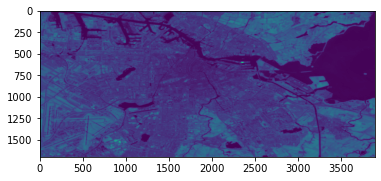

In [49]:
plt.imshow(average[:,:,1])